In [2]:
import os, time, random
import numpy as np
import pandas as pd
import cv2, torch
from tqdm.auto import tqdm
import shutil as sh

from IPython.display import Image, clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%%time
!pip install -U pycocotools
%pip install -qr yolov5/requirements.txt
%copy yolov5/requirements.txt ./
#!git clone https://github.com/ultralytics/yolov5

Note: you may need to restart the kernel to use updated packages.
The syntax of the command is incorrect.
Wall time: 18.8 s


In [3]:
img_h, img_w, num_channels = (380, 676, 3)
data = pd.read_csv('data/train_solution_bounding_boxes (1).csv')
data.rename(columns={'image':'image_id'}, inplace=True)
data['image_id'] = data['image_id'].apply(lambda x: x.split('.')[0])
data['x_center'] = (data['xmin'] + data['xmax'])/2
data['y_center'] = (data['ymin'] + data['ymax'])/2
data['w'] = data['xmax'] - data['xmin']
data['h'] = data['ymax'] - data['ymin']
data['classes'] = 0
data['x_center'] = data['x_center']/img_w
data['w'] = data['w']/img_w
data['y_center'] = data['y_center']/img_h
data['h'] = data['h']/img_h
data.head()

,image_id,xmin,ymin,xmax,ymax,x_center,y_center,w,h,classes
0,vid_4_1000,281.259045,187.035071,327.727931,223.225547,0.450434,0.539817,0.068741,0.095238,0
1,vid_4_10000,15.163531,187.035071,120.329957,236.430180,0.100217,0.557191,0.155572,0.129987,0
2,vid_4_10040,239.192475,176.764801,361.968162,236.430180,0.444645,0.543678,0.181621,0.157014,0
3,vid_4_10020,496.483358,172.363256,630.020260,231.539575,0.833213,0.531451,0.197540,0.155727,0
4,vid_4_10060,16.630970,186.546010,132.558611,238.386422,0.110347,0.559122,0.171491,0.136422,0


In [6]:
index = list(set(data.image_id))
image = random.choice(index)
print("Image ID: %s"%(image))
img = cv2.imread(f'data/training_images/{image}.jpg')
img.shape

Image ID: vid_4_22580


(380, 676, 3)

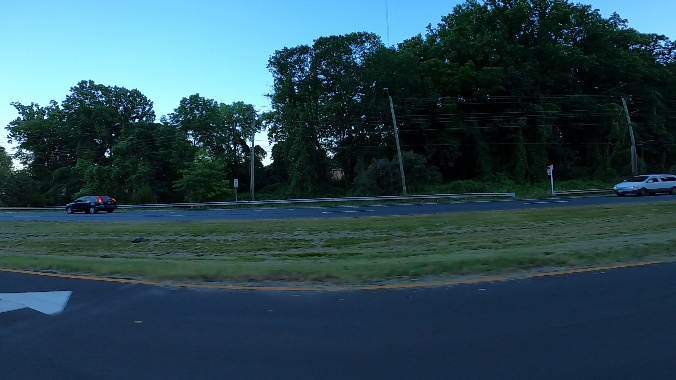

In [7]:
image = random.choice(index)
Image(filename=f'data/training_images/{image}.jpg',width=600)

In [8]:
src = 'training_images'
if True:
    for v in [0]:
        val_index = index[len(index)*v//5:len(index)*(v+1)//5]
        for name,mini in tqdm(data.groupby('image_id')):
            if name in val_index:
                fname = 'val2020/'
            else:
                fname = 'train2020/'
            if not os.path.exists('tmp/fold{}/labels/'.format(v)+fname):
                os.makedirs('tmp/fold{}/labels/'.format(v)+fname)
            with open('tmp/fold{}/labels/'.format(v)+fname+name+".txt", 'w+') as f:
                row = mini[['classes','x_center','y_center','w','h']].astype(float).values
                row = row.astype(str)
                for j in range(len(row)):
                    text = ' '.join(row[j])
                    f.write(text)
                    f.write("\n")
            if not os.path.exists('tmp/fold{}/images/{}'.format(v,fname)):
                os.makedirs('tmp/fold{}/images/{}'.format(v,fname))
            sh.copy("data/{}/{}.jpg".format(src,name),'tmp/fold{}/images/{}/{}.jpg'.format(v,fname,name))

  0%|          | 0/355 [00:00<?, ?it/s]

In [10]:
#!python yolov5/train.py --batch 2 --epochs 1 --data yolov5-config/car.yaml --cfg yolov5-config/yolov5x.yaml --name yolov5x_fold0_new

In [11]:
!python yolov5/detect.py --weights yolov5/yolov5s.pt --img 676 --conf 0.4 --source data/testing_images

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=676, iou_thres=0.45, line_thickness=3, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='data/testing_images', update=False, view_img=False, weights=['yolov5/yolov5s.pt'])

YOLOv5  v5.0-76-g57b0d3a torch 1.8.1+cpu CPU


  0%|          | 0.00/14.1M [00:00<?, ?B/s]
  0%|          | 72.0k/14.1M [00:00<00:21, 669kB/s]
  1%|          | 144k/14.1M [00:00<00:21, 686kB/s] 
  2%|1         | 264k/14.1M [00:00<00:15, 911kB/s]
  3%|3         | 456k/14.1M [00:00<00:11, 1.28MB/s]
  6%|5         | 808k/14.1M [00:00<00:06, 2.04MB/s]
  8%|7         | 1.07M/14.1M [00:00<00:05, 2.28MB/s]
 10%|#         | 1.43M/14.1M [00:00<00:04, 2.70MB/s]
 12%|#2        | 1.73M/14.1M [00:00<00:04, 2.78MB/s]
 14%|#4        | 1.99M/14.1M [00:00<00:04, 2.71MB/s]
 17%|#6        | 2.35M/14.1M [00:01<00:04, 2.93MB/s]
 19%|#8        | 2.63M/14.1M [00:01<00:04, 2.89MB/s]
 21%|##        | 2.93M/14.1M [00:01<00:03, 2.95MB/s]
 23%|##2       | 3.23M/14.1M [00:01<00:03, 2.96MB/s]
 25%|##4       | 3.52M/14.1M [00:01<00:03, 3.01MB/s]
 27%|##7       | 3.84M/14.1M [00:01<00:03, 3.05MB/s]
 29%|##9       | 4.15M/14.1M [00:01<00:03, 3.05MB/s]
 32%|###1      | 4.45M/14.1M [00:01<00:03, 2.97MB/s]
 34%|###3     


requirements: requirements.txt not found, check failed.

image 1/175 C:\Users\Admin\Desktop\sem6\seminar\data\testing_images\vid_5_25100.jpg: 416x704 Done. (1.469s)
image 2/175 C:\Users\Admin\Desktop\sem6\seminar\data\testing_images\vid_5_25120.jpg: 416x704 Done. (0.751s)
image 3/175 C:\Users\Admin\Desktop\sem6\seminar\data\testing_images\vid_5_25140.jpg: 416x704 Done. (0.814s)
image 4/175 C:\Users\Admin\Desktop\sem6\seminar\data\testing_images\vid_5_25160.jpg: 416x704 Done. (0.776s)
image 5/175 C:\Users\Admin\Desktop\sem6\seminar\data\testing_images\vid_5_25180.jpg: 416x704 Done. (0.774s)
image 6/175 C:\Users\Admin\Desktop\sem6\seminar\data\testing_images\vid_5_25200.jpg: 416x704 Done. (0.739s)
image 7/175 C:\Users\Admin\Desktop\sem6\seminar\data\testing_images\vid_5_25220.jpg: 416x704 Done. (0.773s)
image 8/175 C:\Users\Admin\Desktop\sem6\seminar\data\testing_images\vid_5_25240.jpg: 416x704 Done. (0.765s)
image 9/175 C:\Users\Admin\Desktop\sem6\seminar\data\testing_images\vid_5_2526

100%|##########| 14.1M/14.1M [00:05<00:00, 2.78MB/s]
Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients


In [12]:
predicted_files = []
for (dirpath, dirnames, filenames) in os.walk("ouput/exp"):
    predicted_files.extend(filenames)

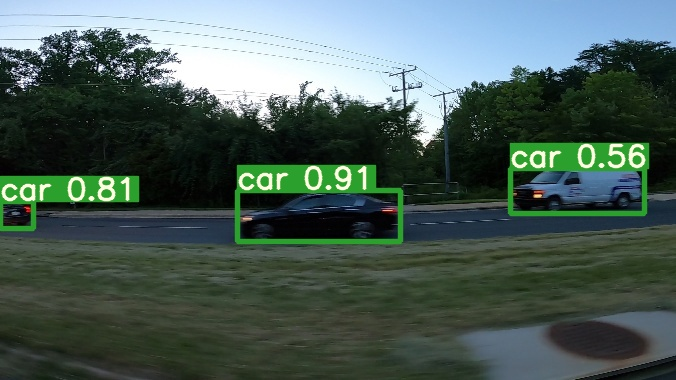

In [14]:
Image(filename=f'ouput/exp/{random.choice(predicted_files)}')